## `Unemployment` Analysis

#### Import required lib

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading dataset

In [27]:
df = pd.read_csv(r'E:\PYTHON\Unemployment analysis\Dataset\Unemployment in India.csv')

In [28]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10806105,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9299466,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9240903,40.67,Urban


#### Finding `Null` Values

In [29]:
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

#### Extract `Year` from Date Column

In [30]:
# df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year

#### Another Simple Method

In [31]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

## `Data Visualizations`

#### `Unemployment Rate` by `Year`


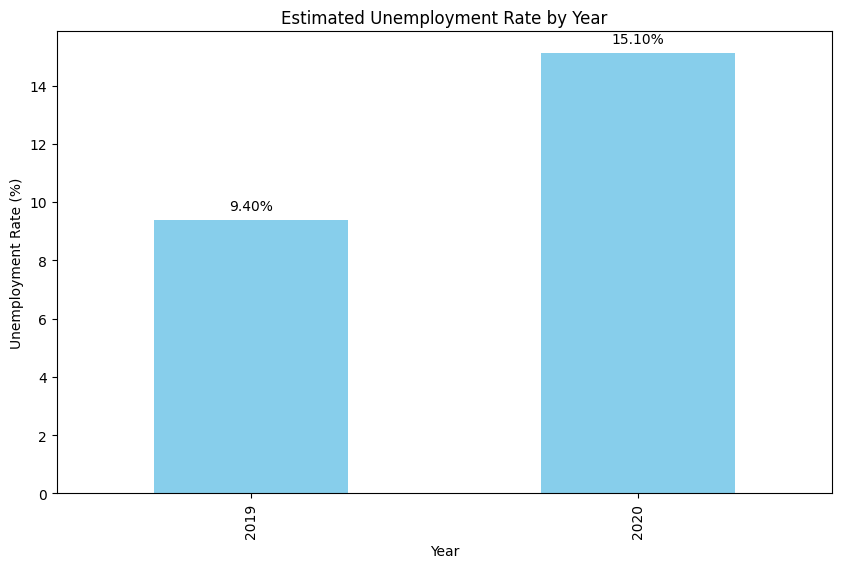

In [32]:
plt.figure(figsize=(10, 6))
ax = df.groupby('Year')['Estimated Unemployment Rate (%)'].mean().plot(kind='bar', color='skyblue')
plt.title('Estimated Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Add percentage numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### Plot a `heatmap` of the `correlation matrix`


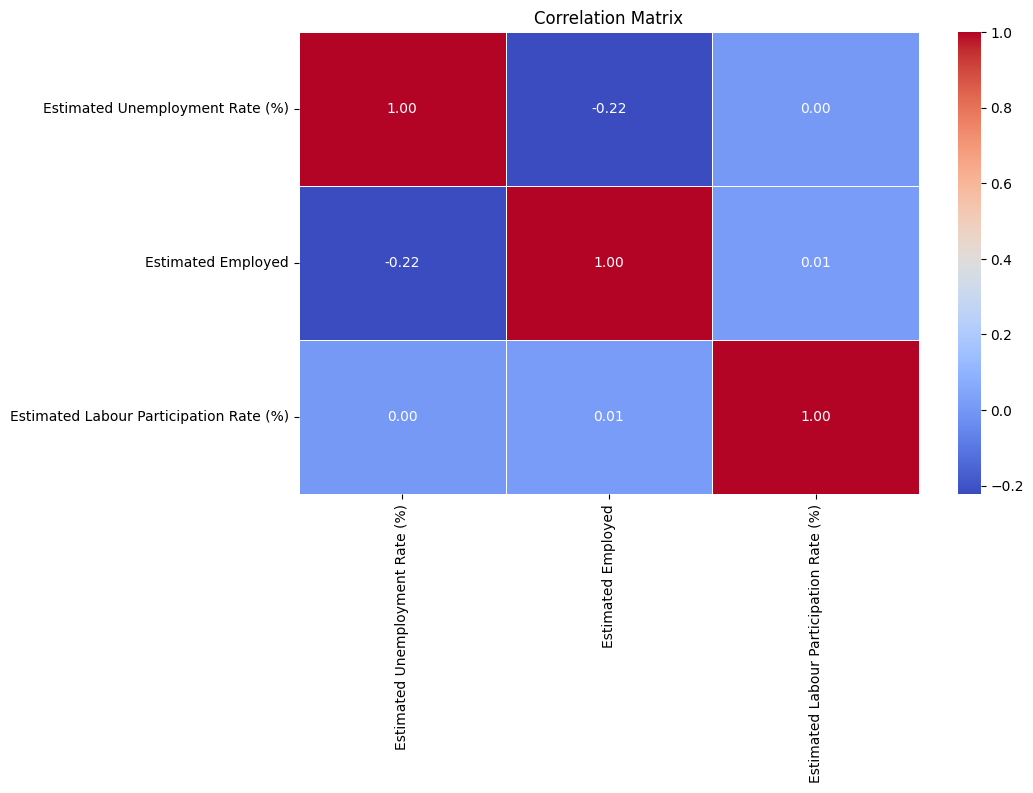

In [33]:

# Calculate correlation matrix
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### `Scatter plot` between `Unemployment Rate` and `Labour Participation Rate`

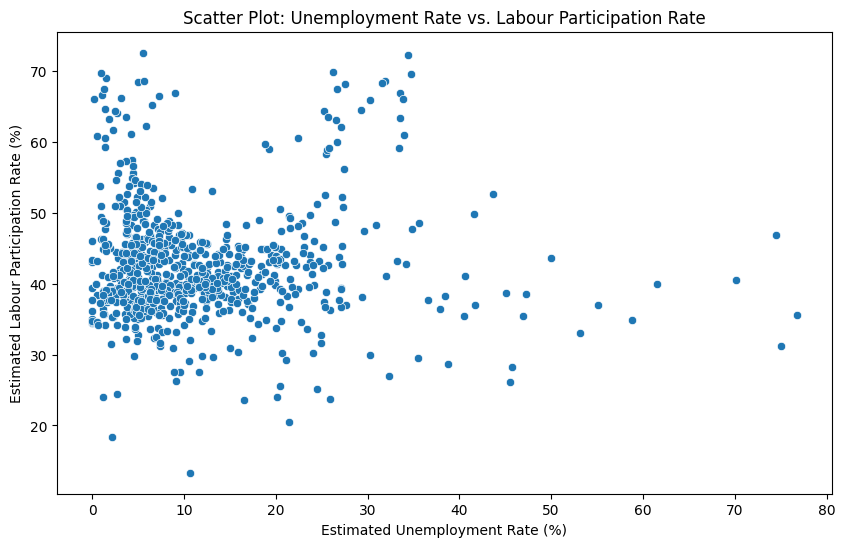

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=df)
plt.title('Scatter Plot: Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()

#### `Bar Plot` to compare `unemployment rates` across different `regions` in Year `2019`


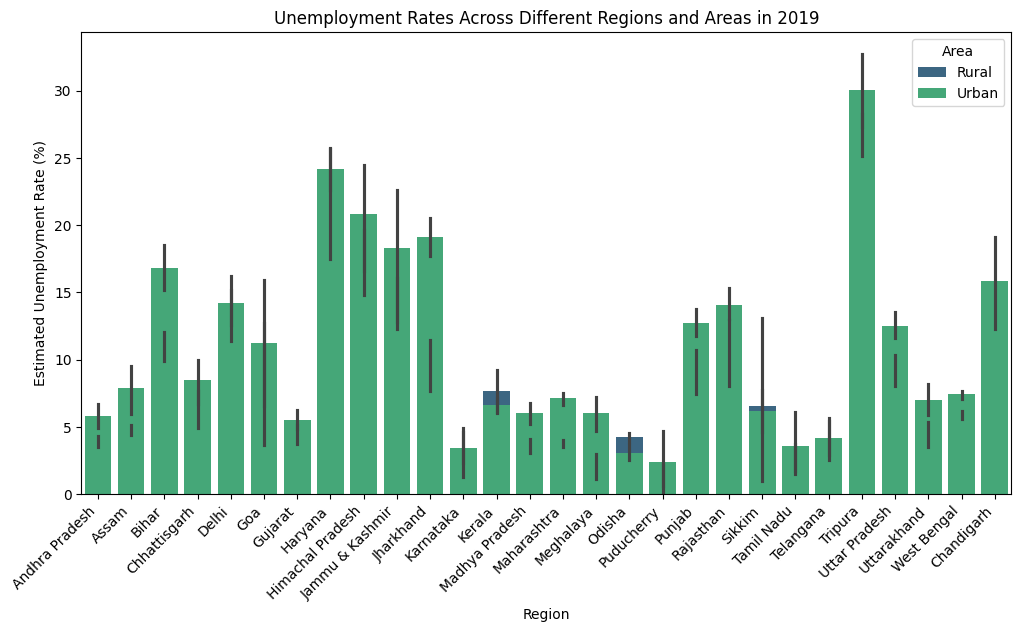

In [55]:
# Filter the DataFrame for the year 2019
df_2019 = df[df['Year'] == 2019]

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', hue='Area', data=df_2019, dodge=False, palette='viridis')
plt.title('Unemployment Rates Across Different Regions and Areas in 2019')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### `Bar Plot` to compare `unemployment rates` across different `regions` in Year `2020`


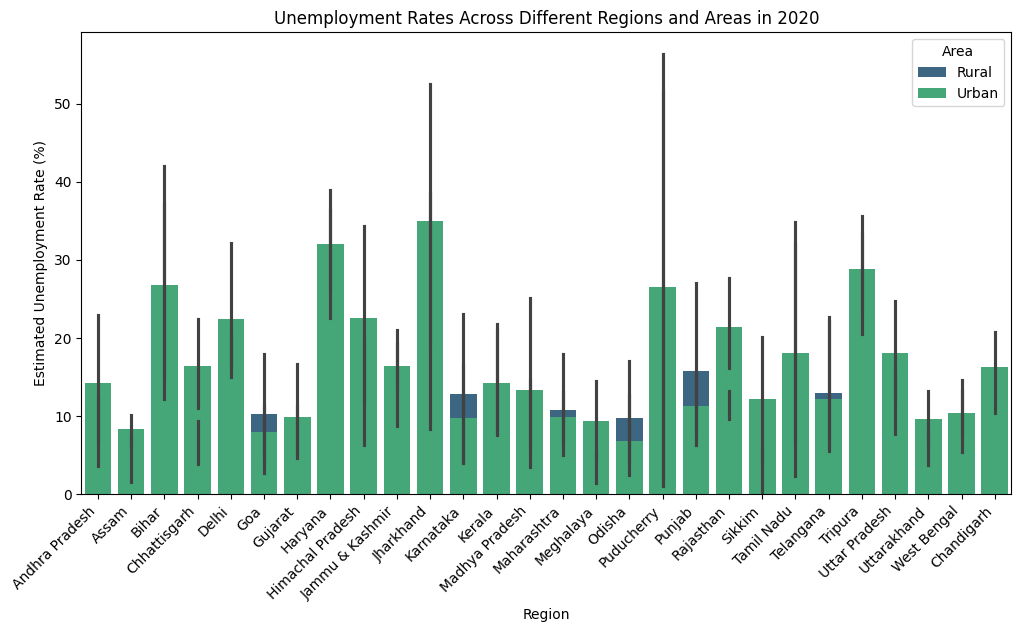

In [56]:
# Filter the DataFrame for the year 2019
df_2020 = df[df['Year'] == 2020]

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', hue='Area', data=df_2020, dodge=False, palette='viridis')
plt.title('Unemployment Rates Across Different Regions and Areas in 2020')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### `Variations` in `Unemployment Rates` Across Different `Regions`

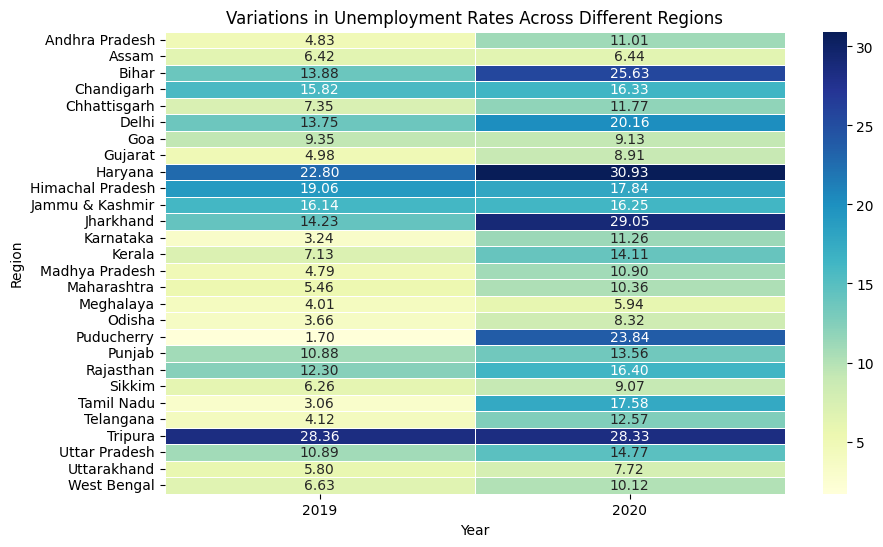

In [37]:
# Convert 'Estimated Unemployment Rate (%)' to numeric
df_var = df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')

# Handle duplicates by taking the mean
df_var = df.groupby(['Year', 'Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Pivot the DataFrame for the heatmap
heatmap_data = df_var.pivot(index='Region', columns='Year', values='Estimated Unemployment Rate (%)')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Variations in Unemployment Rates Across Different Regions')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

#### Estimated `Unemployment Rate` by `Area` and `Year`

<Figure size 2000x1000 with 0 Axes>

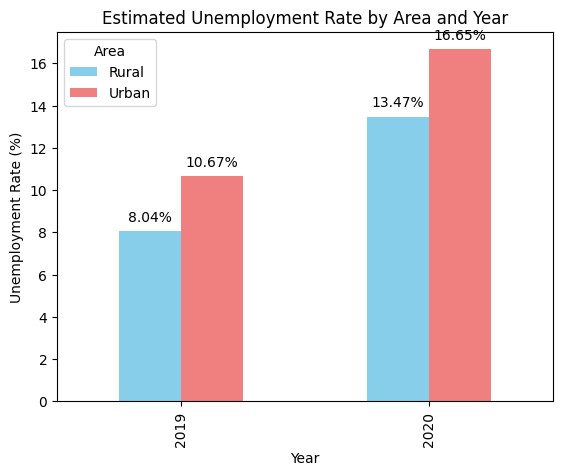

In [50]:
plt.figure(figsize=(20, 10))
ax = df.groupby(['Year', 'Area'])['Estimated Unemployment Rate (%)'].mean().unstack().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Estimated Unemployment Rate by Area with Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area', loc='upper left')

# Add percentage numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### `Plotting` estimated `employed` count across `regions` for each `year`


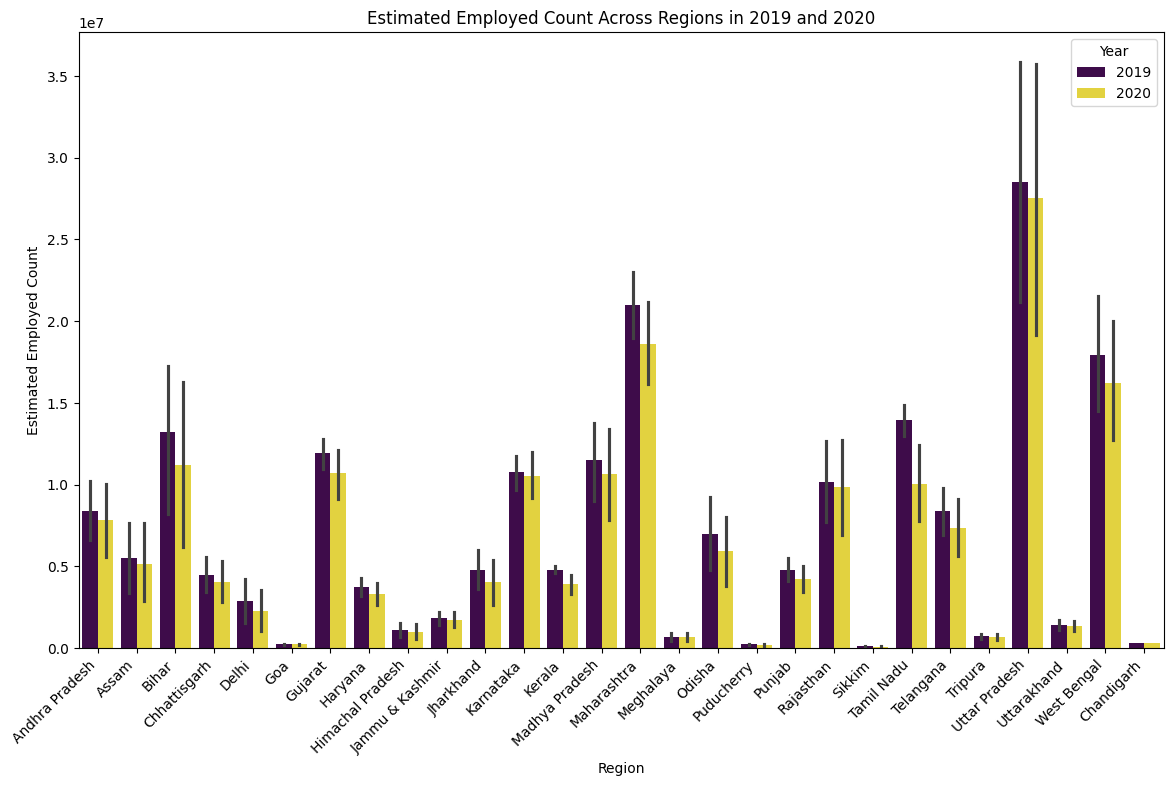

In [57]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Estimated Employed', hue='Year', data=df, palette='viridis')

plt.title('Estimated Employed Count Across Regions in 2019 and 2020')
plt.xlabel('Region')
plt.ylabel('Estimated Employed Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')

plt.show()

<Figure size 2000x1000 with 0 Axes>

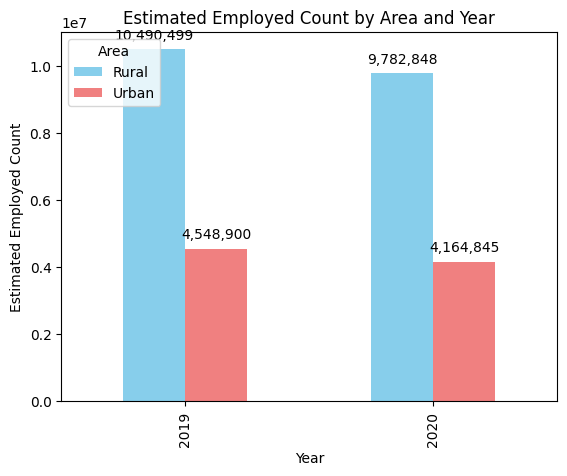

In [74]:
# Plotting estimated employed count across areas for each year
plt.figure(figsize=(20, 10))
ax = df.groupby(['Year', 'Area'])['Estimated Employed'].mean().unstack().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Estimated Employed Count by Area and Year')
plt.xlabel('Year')
plt.ylabel('Estimated Employed Count')
plt.legend(title='Area', loc='upper left')

# Add actual employed count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
